In [1]:
# Dependencies
import json
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
from pprint import pprint

In [2]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Hashtags
target_user =["@BBC", "@CBSNews", "@cnni", "@FoxNews", "@nytimes"]

In [5]:
# List for dictionaries of results
user_results_means_list= []
user_result_list = []
bbc_results = []

In [6]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
#get created at to see the result is coming 
public_tweets = api.user_timeline("@BBC", page=1)
pprint(public_tweets[1]["user"]["created_at"])

'Thu Jan 29 08:30:16 +0000 2009'


In [8]:
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    tweet_text_list = []
    tweet_times = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            tweet_text = tweet["text"]
            tweet_time = tweet["user"]["created_at"]
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
           # Add each value to the appropriate list
            tweet_text_list.append(tweet_text)
            tweet_times.append(tweet_time)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Create a dictionaty of results
    user_results_means = {
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
        }
    user_results = {
        "Text" : tweet_text_list,
        "Tweet Time" : tweet_times,
        "Compound Score": compound_list,
        "Postive Score": positive_list,
        "Neutral Score": neutral_list,
        "Negative Score": negative_list
        }
        
    # Append dictionary to list
    
    user_results_means_list.append(user_results_means)
    
    if user == "@BBC":
        bbc_df = pd.DataFrame(user_results)
    elif user == "@CBSNews":
       cbs_df = pd.DataFrame(user_results)
    elif user == "@cnni":
       cnn_df = pd.DataFrame(user_results)
    elif user == "@FoxNews":
       fox_df = pd.DataFrame(user_results)
    elif user == "@nytimes":
       nyt_df = pd.DataFrame(user_results)

In [9]:
nyt_df.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Text,Tweet Time
0,-0.1027,0.188,0.680,0.132,Michigan will stop providing free bottled wate...,Fri Mar 02 20:41:42 +0000 2007
1,0.0258,0.000,0.939,0.061,Many people taking antidepressants are saying ...,Fri Mar 02 20:41:42 +0000 2007
2,0.3400,0.000,0.821,0.179,North Korea Said to Offer Direct Assurance It ...,Fri Mar 02 20:41:42 +0000 2007
3,0.7351,0.000,0.725,0.275,The snow monkeys of Japan like a nice warm bat...,Fri Mar 02 20:41:42 +0000 2007
4,-0.6124,0.267,0.733,0.000,A Town That Lives for Hockey Is Devastated by ...,Fri Mar 02 20:41:42 +0000 2007


In [10]:
#Add timestamp to dataFrames
bbc_df["Timestamp"] = range(1, 101)
cbs_df["Timestamp"] = range(1, 101)
cnn_df["Timestamp"] = range(1, 101)
fox_df["Timestamp"] = range(1, 101)
nyt_df["Timestamp"] = range(1, 101)

In [11]:
#reorganise the dataFrames Collumns
organized_bbc_df = bbc_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]
organized_cbs_df = cbs_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]
organized_cnn_df = cnn_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]
organized_fox_df = fox_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]
organized_nyt_df = nyt_df[["Timestamp","Tweet Time","Text","Compound Score","Neutral Score","Negative Score","Postive Score"]]


In [16]:
#Get the all compound values and put them in single dataFrame
compound_values_df = pd.DataFrame(organized_bbc_df["Timestamp"])
compound_values_df["BBC_Compound"] = organized_bbc_df["Compound Score"]
compound_values_df["CBS_Compound"] = organized_cbs_df["Compound Score"]
compound_values_df["CNN_Compound"] = organized_cnn_df["Compound Score"]
compound_values_df["FOX_Compound"] = organized_fox_df["Compound Score"]
compound_values_df["NYT_Compound"] = organized_nyt_df["Compound Score"]
#compound_values_df["Timestamp"] = organized_bbc_df["Timestamp"]
compound_values_df.head()

,Timestamp,BBC_Compound,CBS_Compound,CNN_Compound,FOX_Compound,NYT_Compound
0,1,0.0000,0.0000,0.0000,-0.3566,-0.1027
1,2,0.4939,0.0000,0.6369,0.4019,0.0258
2,3,0.2500,-0.3400,0.5719,0.6908,0.3400
3,4,0.0000,-0.8860,0.7717,0.6249,0.7351
4,5,0.0000,-0.2617,0.3400,0.0000,-0.6124


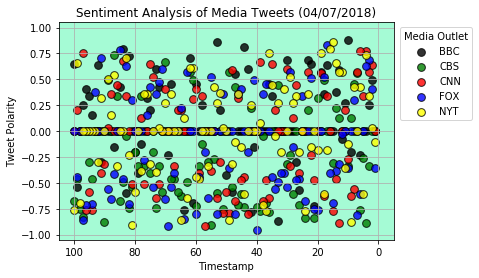

In [18]:
#create a scatter plot which contains all the madia outlets compound values
ax = compound_values_df.plot(kind="scatter", x="Timestamp",y="BBC_Compound", color="black", edgecolors="black", s=60,  alpha=0.80, label="BBC")
compound_values_df.plot(kind="scatter", x="Timestamp",y="CBS_Compound", color="green", edgecolors="black",s=60, alpha=0.80, label="CBS", ax=ax)
compound_values_df.plot(kind="scatter", x="Timestamp",y="CNN_Compound", color="red", edgecolors="black",s=60, alpha=0.80,label="CNN", ax=ax)
compound_values_df.plot(kind="scatter", x="Timestamp",y="FOX_Compound", color="blue", edgecolors="black",s=60, alpha=0.80,label="FOX", ax=ax)
compound_values_df.plot(kind="scatter", x="Timestamp",y="NYT_Compound", color="yellow", edgecolors="black",s=60, alpha=0.80, label="NYT", ax=ax)
#create a title
plt.title("Sentiment Analysis of Media Tweets (04/07/2018)")
#create a y label
plt.ylabel("Tweet Polarity")
#set background color
ax.set_facecolor('xkcd:pale turquoise')
#Putting Legend
plt.legend(title = "Media Outlet", loc="upper right",bbox_to_anchor=(1.25, 1))
#set x and y limits
plt.xlim([105,-5]) #Bonus
plt.ylim([-1.05,1.05]) #Bonus
#set a grid
plt.grid()
#plot the chart
plt.show()

In [20]:
#create a dataframe from user results means data
overall_sentiments_df = pd.DataFrame(user_results_means_list)
#put target users in to the data frame
overall_sentiments_df["Media Outlet"] = target_user
#reorganising the collumns
overall_sentiments_df = overall_sentiments_df[["Media Outlet","Compound Score","Neutral Score","Negative Score","Postive Score"]]
overall_sentiments_df


,Media Outlet,Compound Score,Neutral Score,Negative Score,Postive Score
0,@BBC,0.091746,0.86137,0.04773,0.09089
1,@CBSNews,-0.208916,0.79065,0.15731,0.05201
2,@cnni,-0.051000,0.82785,0.09630,0.07586
3,@FoxNews,-0.116264,0.81401,0.12352,0.06247
4,@nytimes,0.013251,0.82973,0.08827,0.08201


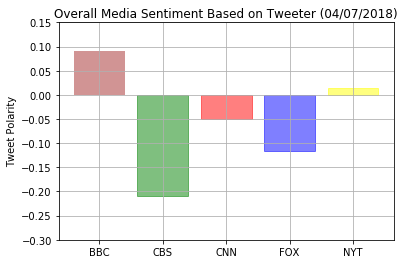

In [21]:
#Creating bar chart that show the madia outlet overal sentiment data
bar_chart = plt.bar(overall_sentiments_df["Media Outlet"],overall_sentiments_df["Compound Score"], 
                    color ='brown', alpha=0.5, align="edge")
x_axis = np.arange(len(overall_sentiments_df["Media Outlet"]))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
# add the title
plt.title("Overall Media Sentiment Based on Tweeter (04/07/2018)")
plt.ylabel("Tweet Polarity")
bar_chart[1].set_color('green')
bar_chart[2].set_color('red')
bar_chart[3].set_color('blue')
bar_chart[4].set_color('yellow')

plt.ylim([-0.3,0.15]) #Bonus
plt.grid()
plt.show()

In [36]:
#Excract data to csv
writer = pd.ExcelWriter('Media_Outlet_result.xlsx')
overall_sentiments_df.to_excel(writer, index=False, sheet_name='Overal Media Sentiment')
organized_bbc_df.to_excel(writer,index=False, sheet_name='BBC')
organized_cbs_df.to_excel(writer,index=False, sheet_name='CBS')
organized_cnn_df.to_excel(writer,index=False, sheet_name='CNN')
organized_fox_df.to_excel(writer,index=False, sheet_name='FOX')
organized_nyt_df.to_excel(writer,index=False, sheet_name='NYT')
writer.save()